## In class examples

### Example 1

In [2]:
import numpy as np
from a2 import direct_stiffness_method as dsm

# Define nodes and elements
nodes = np.array([[0, 0, 10], [15, 0, 10],[15,0,0]])
elements = np.array([[0, 1],[1,2]])

# Define subdomains and material properties
b,h=0.5,1.0
E=1000
nu=0.3
A=b*h
Iy=h*(b**3)/12
Iz=b*(h**3)/12
Ip=b*h/12*(b**2+h**2)
J=0.02861
E0_local_z=[0,0,1]
E1_local_z=[1,0,0]
subdomain_dict = {1:[E,nu,A,Iz,Iy,Ip,J,E0_local_z],
                  2:[E,nu,A,Iz,Iy,Ip,J,E1_local_z]}
subdomain_elements = {1:[0],2:[1]}

# Define supports and loads
supports = {0: (0, 0, 0, 0, 0, 0), # Fixed support at node 0
            2: (0, 0, 0, None, None, None)}  # Pinned support at node 0
loads = {1:[0.1,0.05,-0.07,0.05,-0.1,0.25]}  # Load at node 1

# Initialize classes
mesh = dsm.Mesh(nodes, elements)
materials = dsm.MaterialParams(subdomain_dict)
for subdomain_id, elements_in_sub in subdomain_elements.items():
    materials.assign_subdomain(subdomain_id, elements_in_sub)

bcs = dsm.BoundaryConditions(supports)
bcs.add_load(loads)

# Solve the system
solver = dsm.Solver(mesh, materials, bcs)
displacements, reactions = solver.generate_mesh_and_solve()

node 0 disp: [u:0.0, v:0.0, w:0.0, theta_x:0.0, theta_y:0.0, theta_z:0.0]
node 0 rxn: [Fx:-0.09468, Fy:-0.0342, Fz:0.0047, Mx:0.10799, My:-0.0236, Mz:-0.76302]
------------------------------------------------------------------
node 1 disp: [u:0.00284, v:1.59843, w:-0.00131, theta_x:-0.1472, theta_y:-0.01673, theta_z:0.18234]
node 1 rxn: [Fx:0.0, Fy:0.0, Fz:0.0, Mx:0.0, My:0.0, Mz:0.0]
------------------------------------------------------------------
node 2 disp: [u:0.0, v:0.0, w:0.0, theta_x:-0.16616, theta_y:0.00879, theta_z:0.18234]
node 2 rxn: [Fx:-0.00532, Fy:-0.0158, Fz:0.0653, Mx:0.0, My:0.0, Mz:0.0]
------------------------------------------------------------------


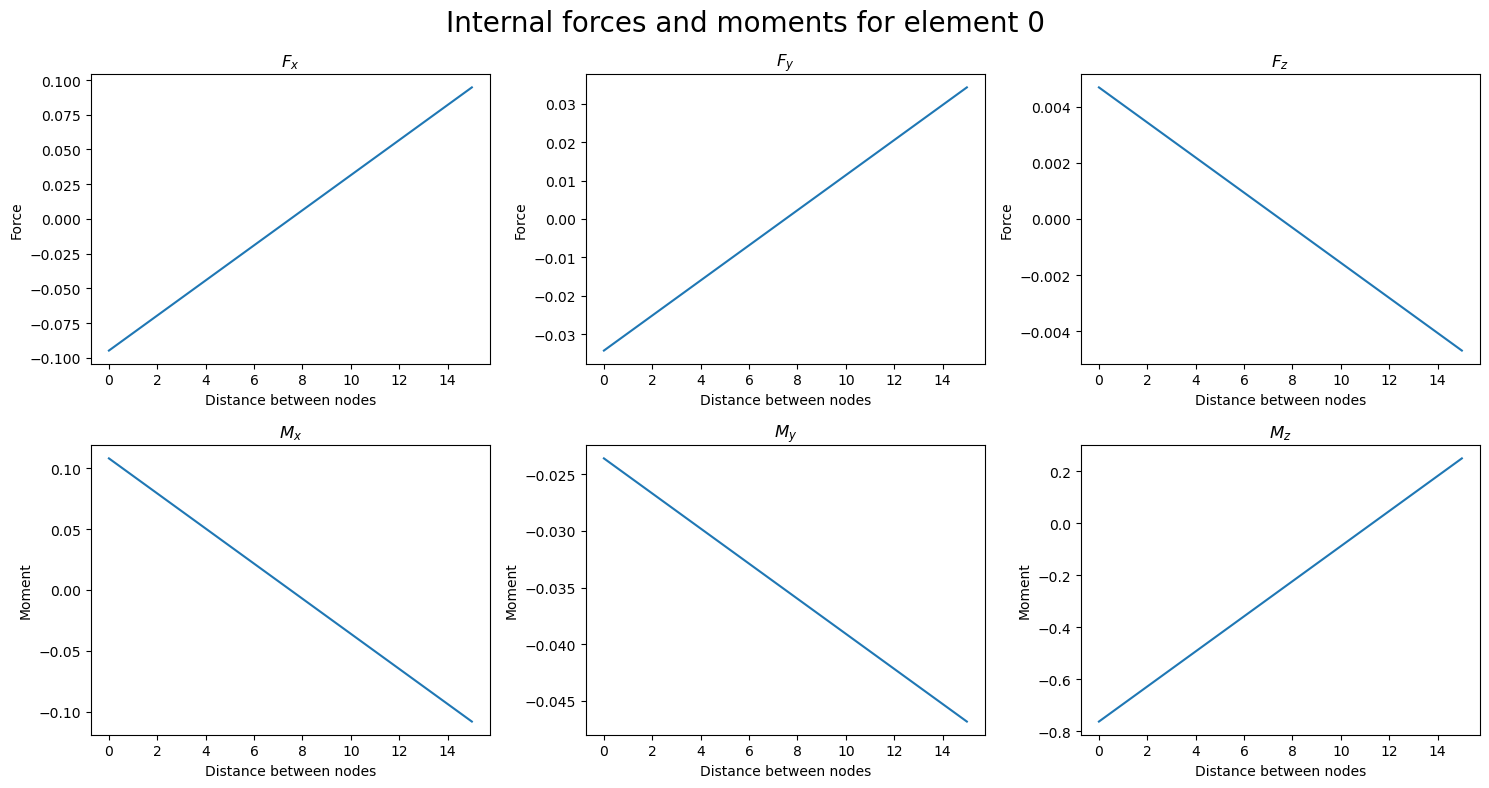

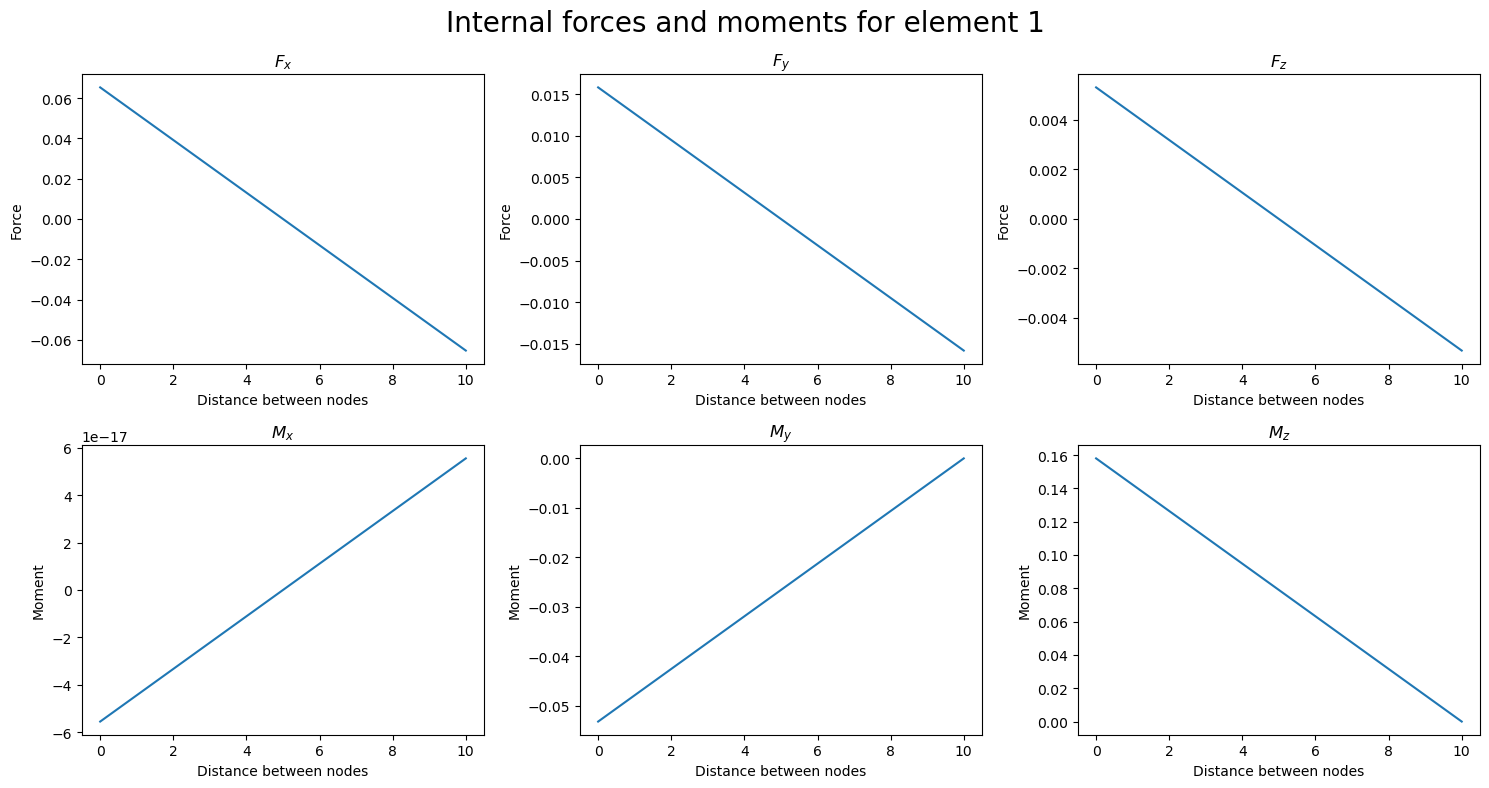

In [3]:
int_forces = solver.compute_local_int_forces_and_moments(displacements)
solver.plot_internal_forces(int_forces)

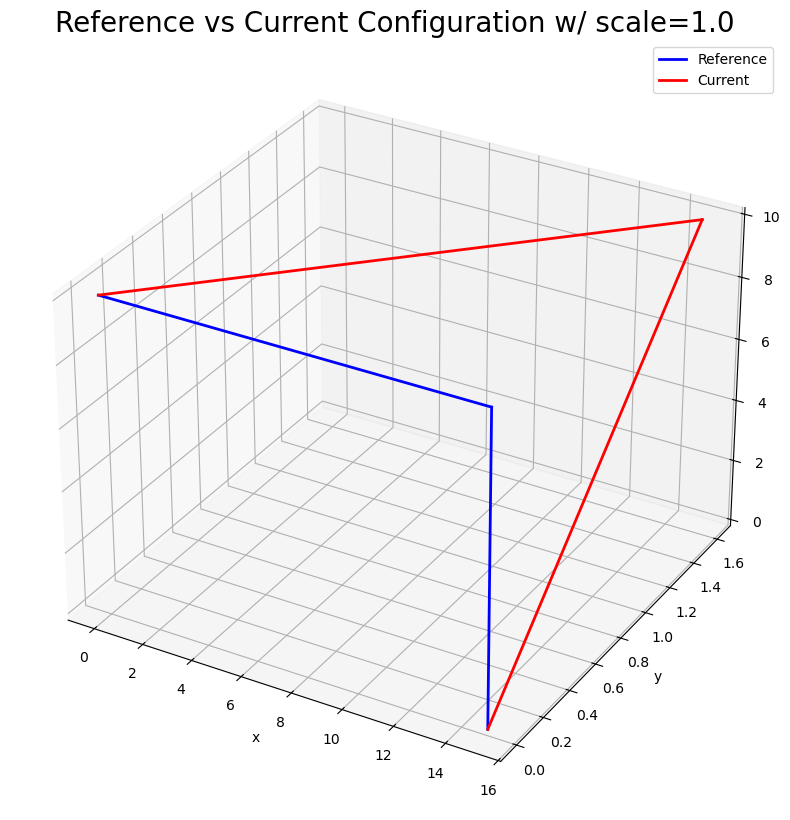

In [4]:
solver.plot_deformed_structure(displacements,scale=1.0)

### Example 2

In [5]:
import numpy as np
from a2 import direct_stiffness_method as dsm

# Define nodes and elements
nodes = np.array([[0, 0, 0], [-5, 1, 10],[-1,5,13],[-3,7,11],[6,9,5]])
elements = np.array([[0, 1],[1,2],[2,3],[2,4]])

# Define subdomains and material properties
r=1
E=500
nu=0.3
A=np.pi*r**2
Iy=Iz=np.pi*r**4/4
Ip=J=np.pi*r**4/2
subdomain_dict = {1:[E,nu,A,Iz,Iy,Ip,J]}
subdomain_elements = {1:[0,1,2,3]}

# Define supports and loads
supports = {0: (None, None, 0, None, None, None), # Fixed support at node 0
            3: (0, 0, 0, 0, 0, 0),
            4: (0,0,0,None,None,None)}  # Pinned support at node 0
loads = {1:[0.1,-0.05,-0.075,0,0,0],
         2:[0,0,0,0.5,-0.1,0.3]}  # Load at node 1

# Initialize classes
mesh = dsm.Mesh(nodes, elements)
materials = dsm.MaterialParams(subdomain_dict)
for subdomain_id, elements_in_sub in subdomain_elements.items():
    materials.assign_subdomain(subdomain_id, elements_in_sub)

bcs = dsm.BoundaryConditions(supports)
bcs.add_load(loads)

# Solve the system
solver = dsm.Solver(mesh, materials, bcs)
displacements, reactions = solver.generate_mesh_and_solve()

node 0 disp: [u:0.16297, v:0.06754, w:0.0, theta_x:0.00386, theta_y:-0.00978, theta_z:0.00998]
node 0 rxn: [Fx:0.0, Fy:0.0, Fz:0.00667, Mx:0.0, My:0.0, Mz:0.0]
------------------------------------------------------------------
node 1 disp: [u:0.05684, v:-0.02127, w:-0.04423, theta_x:0.00396, theta_y:-0.0093, theta_z:0.00998]
node 1 rxn: [Fx:0.0, Fy:0.0, Fz:0.0, Mx:0.0, My:0.0, Mz:0.0]
------------------------------------------------------------------
node 2 disp: [u:0.00104, v:0.00109, w:0.00035, theta_x:0.00314, theta_y:-0.00401, theta_z:0.00514]
node 2 rxn: [Fx:0.0, Fy:0.0, Fz:0.0, Mx:0.0, My:0.0, Mz:0.0]
------------------------------------------------------------------
node 3 disp: [u:0.0, v:0.0, w:0.0, theta_x:0.0, theta_y:0.0, theta_z:0.0]
node 3 rxn: [Fx:-0.02351, Fy:0.13795, Fz:0.02532, Mx:-0.41161, My:0.29812, Mz:-0.36144]
------------------------------------------------------------------
node 4 disp: [u:0.0, v:0.0, w:0.0, theta_x:-0.00455, theta_y:0.00049, theta_z:0.00066]
no

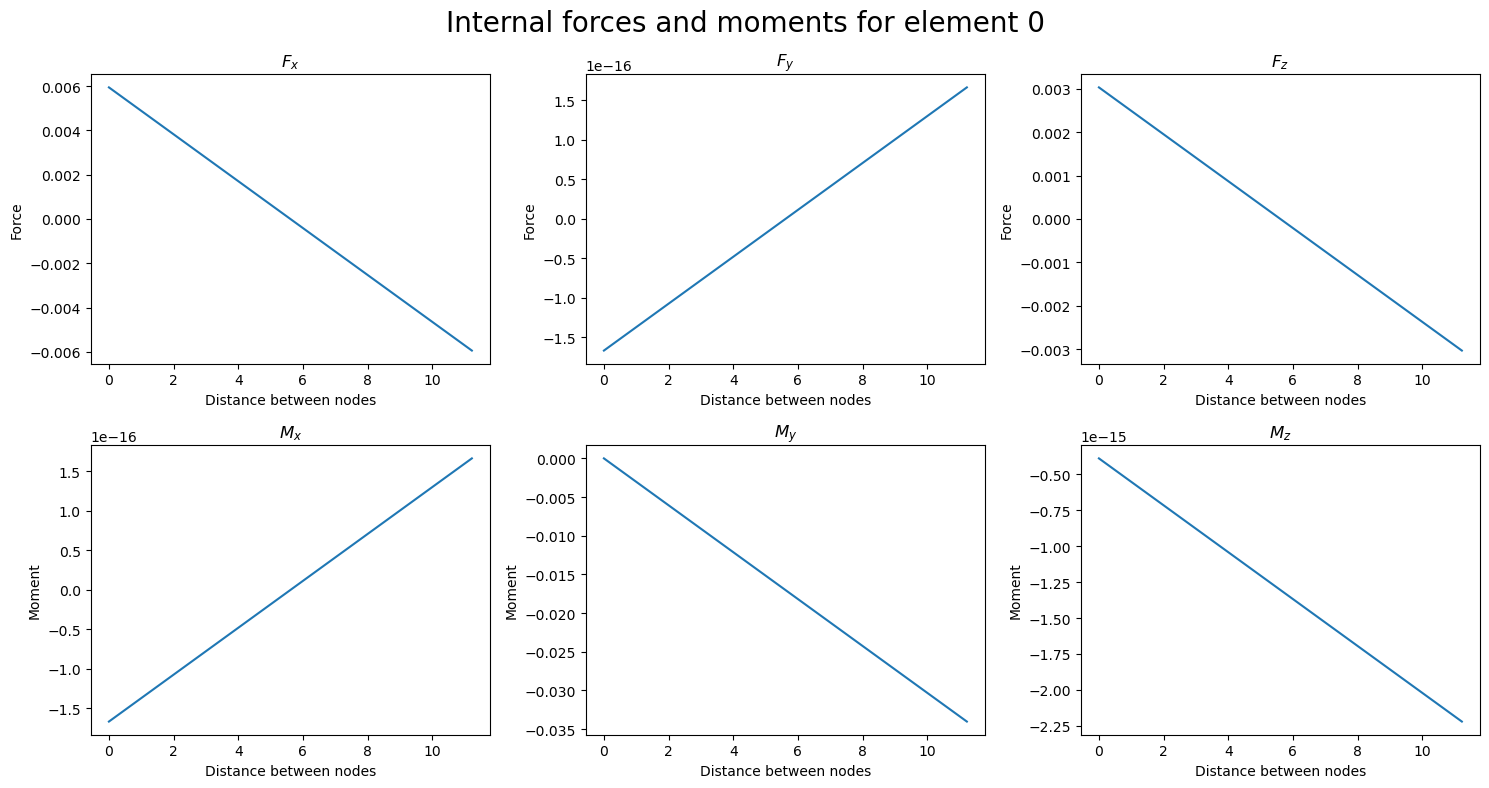

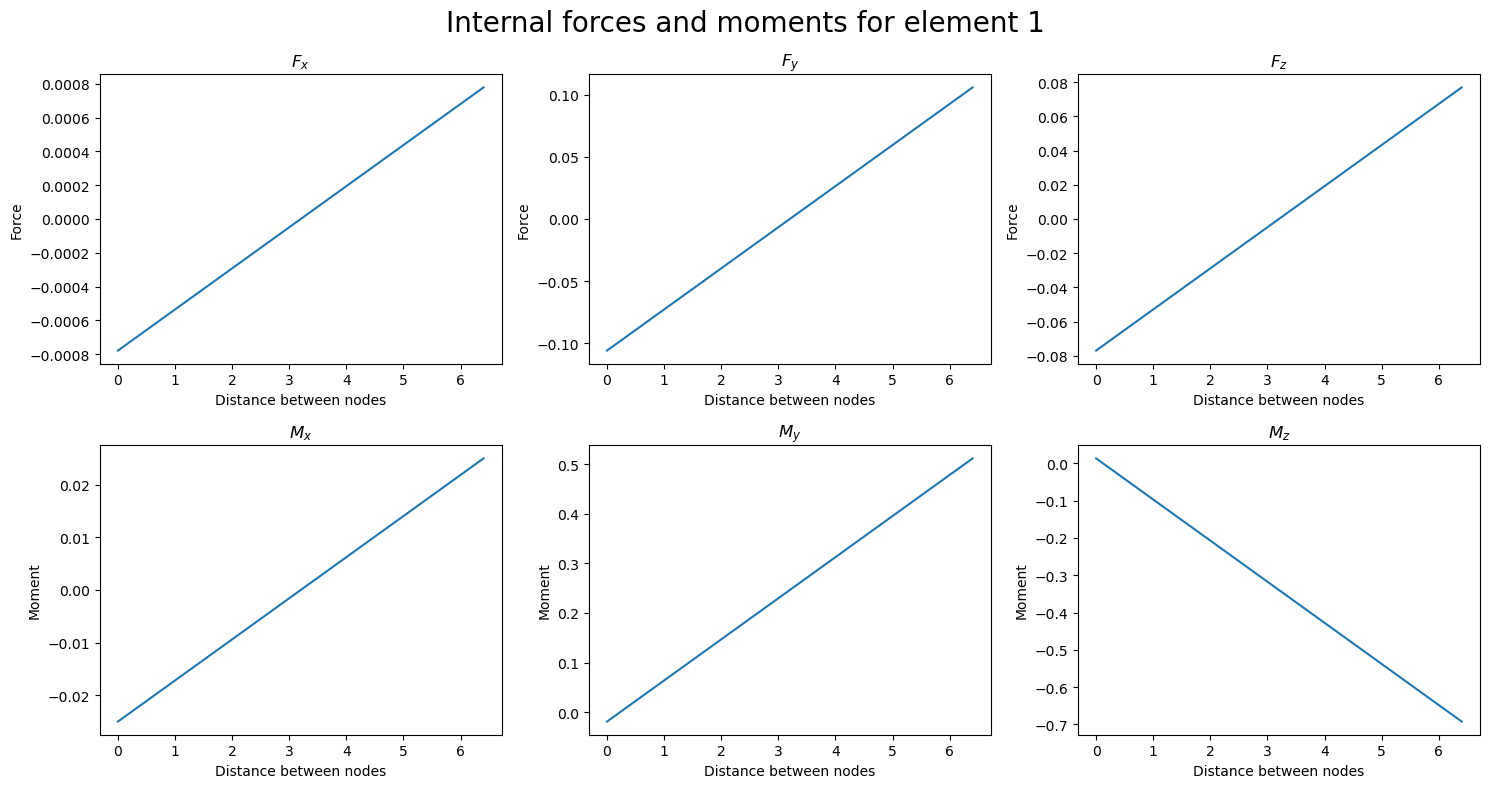

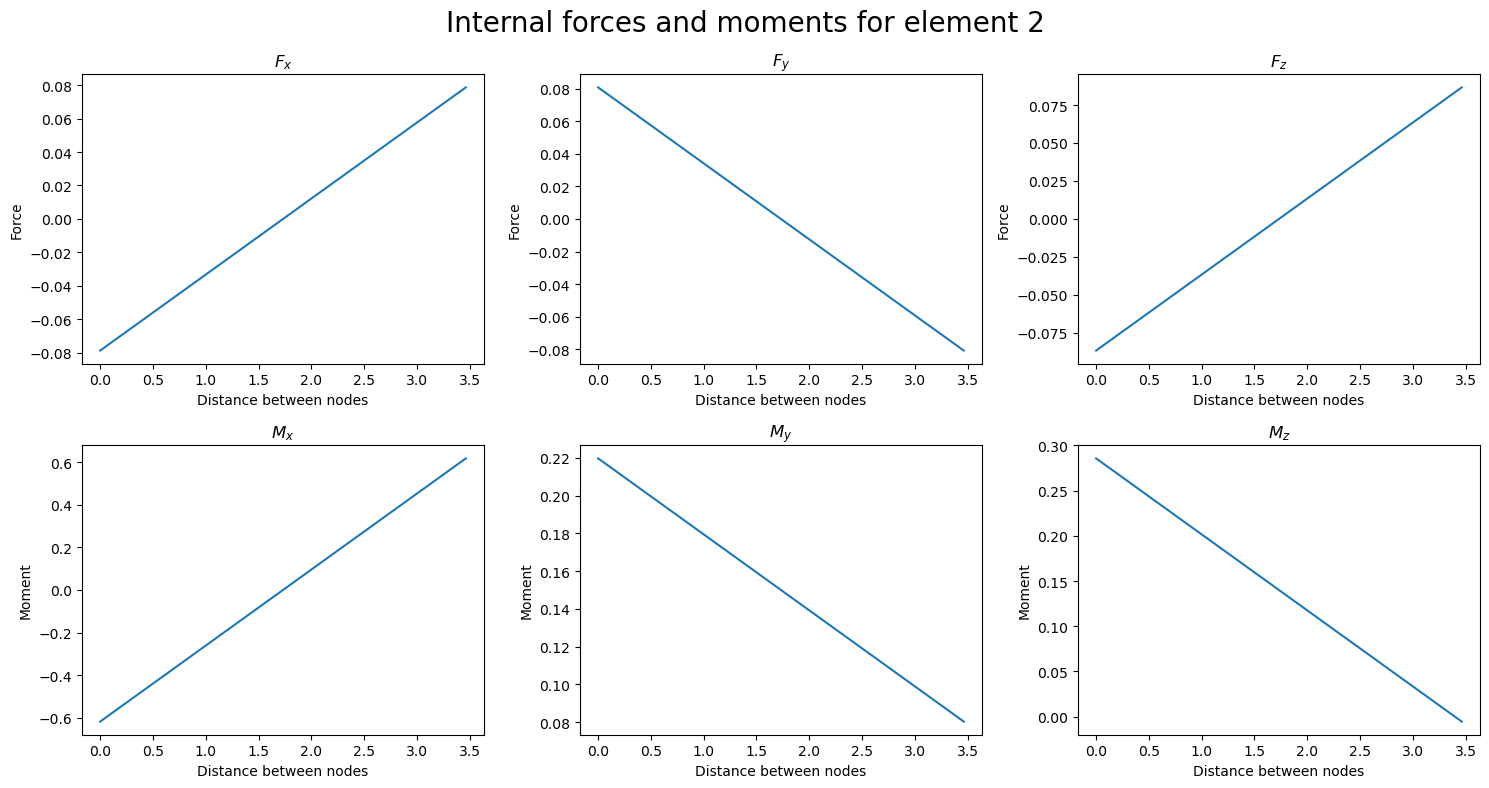

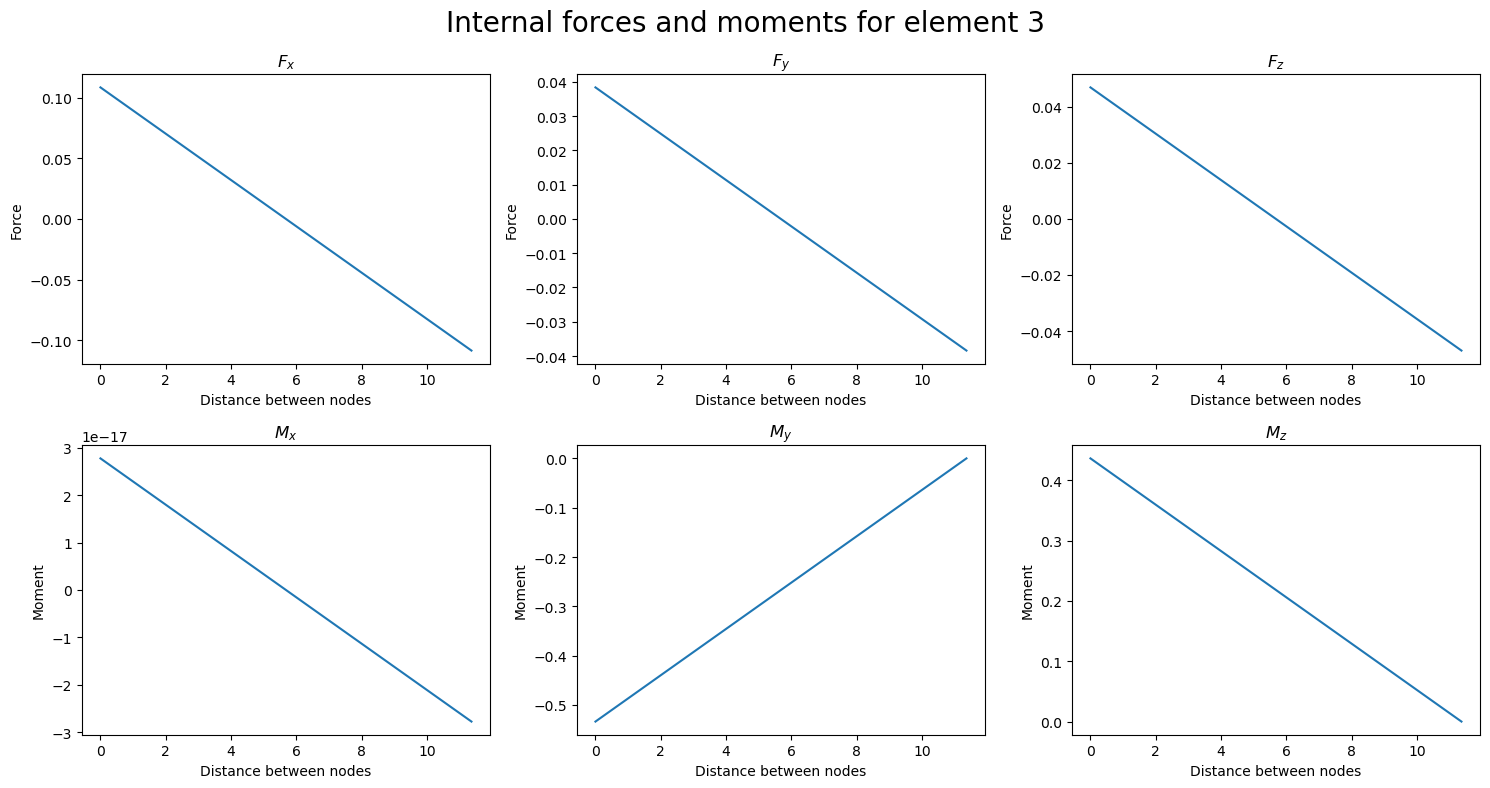

In [6]:
int_forces = solver.compute_local_int_forces_and_moments(displacements)
solver.plot_internal_forces(int_forces)

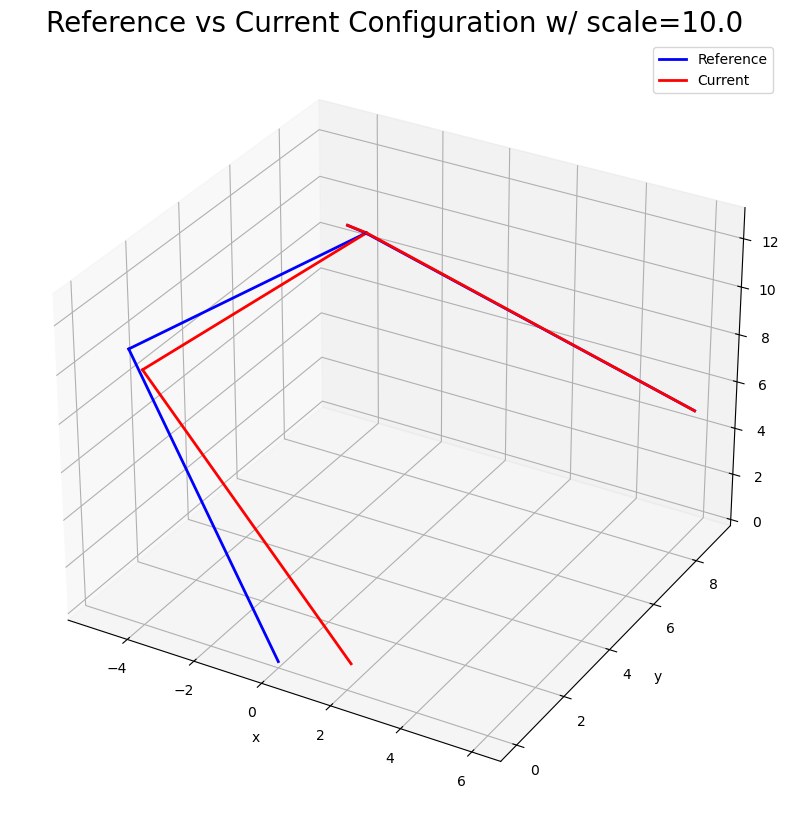

In [7]:
solver.plot_deformed_structure(displacements,scale=10.0)

## Elastic Critical Load Analysis - Example 9.12 from MSA book

In [ ]:
import numpy as np
from a2 import direct_stiffness_method as dsm

# Define nodes and elements
nodes = np.array([[0, 0, 0], [0, 24, 0]])
elements = np.array([[0, 1]])

# Define subdomains and material properties
E=29000
nu=0.3
A=22.4
Iy=82.5
Iz=2100
J=2.68
Ip=J # dummy bc never used | need to double check
# E0_local_z=
subdomain_dict = {1:[E,nu,A,Iz,Iy,Ip,J]}
subdomain_elements = {1:[0]}

# Define supports and loads
supports = {0: (0, 0, 0, 0, 0, 0), # Fixed support at node 0
            1: (0, None, 0, None, None, None)}  # Pinned support at node 0
loads = {1:[0,-1,0,0,0,0]}  # Load at node 1

# Initialize classes
mesh = dsm.Mesh(nodes, elements)
materials = dsm.MaterialParams(subdomain_dict)
for subdomain_id, elements_in_sub in subdomain_elements.items():
    materials.assign_subdomain(subdomain_id, elements_in_sub)

bcs = dsm.BoundaryConditions(supports)
bcs.add_load(loads)

# Solve the system
solver = dsm.Solver(mesh, materials, bcs)
# displacements, reactions = solver.generate_mesh_and_solve()
eigvals,eigvecs=solver.solve_critical_buckling_load()
print(f'Critical load factor = {eigvals[0]}')

Critical load = 0.9999999999999876


## Template to run code - Part 1

In the ``tutorials`` folder, we provide the ``run_direct_stiffness_method.ipynb``. You can use the template below to run the code. Please provide the inputs as follow:

**INPUTS**:

- _nodes_: a n by 3 array containing the 3D coordinates of the mesh, where n is the number of nodes.

- _elements_: a m by 2 array containing the connectivities of the mesh, where m is the number of elements.

- _subdomain_dict_: a dictionary containing the properties of the material, where the key stores the ID for the subdomain, and the value a list of properties.
        e.g., subdomain 1 with list of properties E, nu, A, I_z, I_y, I_p, J, local_z_axis - 
        ``{1:[E,nu,A,I_z,I_y,I_p,J,local_z_axis]}``. Note: You can input without any local_z_axis, default is None.

- _subdomain_elements_: a dictionary containing the elements subdomain assignments.
        e.g., subdomain 1 has elements 0,1 - ``{1:[0,1]}``.

- _supports_: a dictionary where the key is the node ID, and the value the list representing the boundary condition. e.g., ``{node_id:[u_x,u_y,u_x,theta_x,theta_y,theta_z]}.

- _load_dict_: a dictionary where the key is the node ID of the load applied, and the value the list representing the load applied.
        e.g., ``{node_id:[F_x,F_y,F_z,M_x,M_y,M_z]}``.

**OUTPUTS**:

- _displacements_: n by 6 array containing the global nodal displacements ``[u_x,u_y,u_z,theta_x,theta_y,theta_z]``.

- _reactions_: n by 6 array containing the global rxn forces ``[F_x,F_y,F_z,M_x,M_y,M_z]``.

In [ ]:
import numpy as np
from a2 import direct_stiffness_method as dsm

# nodes = np.array([[x1,y1,z1],[x2,y2,z2]])
nodes = np.array([[0, 0, 10], [15, 0, 10],[15,0,0]])

# elements = np.array([[node1,node2],[node2,node3]])
elements = np.array([[0, 1],[1,2]])

# Define subdomains and material properties
E=
nu=
A=
Iz=
Iy=
Ip=
J=
E0_local_z=
E1_local_z=
# subdomain_dict = {subdomain_id:[E,nu,A,I_z,I_y,I_p,J,local_z_axis]}
subdomain_dict = {1:[E,nu,A,Iz,Iy,Ip,J,E0_local_z],
                  2:[E,nu,A,Iz,Iy,Ip,J,E1_local_z]}

# subdomain_elements = {subdomain_id:[node_ids]}
subdomain_elements = {1:[0],2:[1]}

# supports = {node_id:[u_x,u_y,u_x,theta_x,theta_y,theta_z]}
supports = {0: (0, 0, 0, 0, 0, 0),
            2: (0, 0, 0, None, None, None)}

# loads = {node_id:[F_x,F_y,F_z,M_x,M_y,M_z]}
loads = {1:[0.1,0.05,-0.07,0.05,-0.1,0.25]}  # Load at node 1

# Initialize classes
mesh = dsm.Mesh(nodes, elements)
materials = dsm.MaterialParams(subdomain_dict)
for subdomain_id, elements_in_sub in subdomain_elements.items():
    materials.assign_subdomain(subdomain_id, elements_in_sub)

bcs = dsm.BoundaryConditions(supports)
bcs.add_load(loads)

# Solve the system
solver = dsm.Solver(mesh, materials, bcs)
displacements, reactions = solver.generate_mesh_and_solve()

In [ ]:
int_forces = solver.compute_local_int_forces_and_moments(displacements)
solver.plot_internal_forces(int_forces)

In [ ]:
solver.plot_deformed_structure(displacements,scale=1.0)

In [ ]:
eigvals,eigvecs=solver.solve_critical_buckling_load()
print(f'Critical load factor = {eigvals[0]}')